# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | manokwari
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | lubao
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | deputatskiy
Processing Record 13 of Set 1 | karaul
City not found. Skipping...
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | ambilobe
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | ola
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | polson
Processing Record 22 of Set 1 | 

Processing Record 33 of Set 4 | russell
Processing Record 34 of Set 4 | bell ville
Processing Record 35 of Set 4 | turukhansk
Processing Record 36 of Set 4 | tommot
Processing Record 37 of Set 4 | butaritari
Processing Record 38 of Set 4 | celestun
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | viedma
Processing Record 43 of Set 4 | glendive
Processing Record 44 of Set 4 | satitoa
City not found. Skipping...
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 4 | wlodawa
Processing Record 47 of Set 4 | kiruna
Processing Record 48 of Set 4 | lima
Processing Record 49 of Set 4 | aklavik
Processing Record 0 of Set 5 | mumford
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | vagur
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | tuy hoa
Processing Record 5 of Set 5 | muravlenko
Processing Re

Processing Record 25 of Set 8 | cavalcante
Processing Record 26 of Set 8 | meyzieu
Processing Record 27 of Set 8 | almaznyy
Processing Record 28 of Set 8 | kedrovyy
Processing Record 29 of Set 8 | asayita
City not found. Skipping...
Processing Record 30 of Set 8 | ilulissat
Processing Record 31 of Set 8 | tornio
Processing Record 32 of Set 8 | pindorama
Processing Record 33 of Set 8 | ahipara
Processing Record 34 of Set 8 | ailigandi
Processing Record 35 of Set 8 | suharau
Processing Record 36 of Set 8 | maniitsoq
Processing Record 37 of Set 8 | olafsvik
Processing Record 38 of Set 8 | knezica
Processing Record 39 of Set 8 | bazarnyye mataki
Processing Record 40 of Set 8 | denpasar
Processing Record 41 of Set 8 | vysokyy
Processing Record 42 of Set 8 | maningrida
Processing Record 43 of Set 8 | suzu
City not found. Skipping...
Processing Record 44 of Set 8 | barcelona
Processing Record 45 of Set 8 | svetlyy
Processing Record 46 of Set 8 | slupsk
Processing Record 47 of Set 8 | komsomol

City not found. Skipping...
Processing Record 13 of Set 12 | sinkat
City not found. Skipping...
Processing Record 14 of Set 12 | hambantota
Processing Record 15 of Set 12 | nome
Processing Record 16 of Set 12 | tambun
Processing Record 17 of Set 12 | salisbury
Processing Record 18 of Set 12 | mandalgovi
Processing Record 19 of Set 12 | varangaon
Processing Record 20 of Set 12 | alofi
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | dunedin
Processing Record 23 of Set 12 | songjianghe
Processing Record 24 of Set 12 | kharp
Processing Record 25 of Set 12 | suhbaatar
Processing Record 26 of Set 12 | front royal
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | ahmadpur east
Processing Record 29 of Set 12 | krasnaya gorka
Processing Record 30 of Set 12 | barbar
City not found. Skipping...
Processing Record 31 of Set 12 | amberley
Processing Record 32 of Set 12 | nouadhibou
Processing Record 33 of Set 12 | ayan
Processing Record 34 of Se

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,29.98,88,91,4.02,EC,1675885254
1,iskateley,67.6803,53.1512,-4.01,82,100,7.24,RU,1675885376
2,manokwari,-0.8667,134.0833,25.18,83,100,5.21,ID,1675885377
3,rikitea,-23.1203,-134.9692,26.39,74,46,6.12,PF,1675885377
4,kapaa,22.0752,-159.3190,25.18,79,0,7.72,US,1675885377


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,88,91,4.02,EC,1675885254
1,iskateley,67.6803,53.1512,-4.01,82,100,7.24,RU,1675885376
2,manokwari,-0.8667,134.0833,25.18,83,100,5.21,ID,1675885377
3,rikitea,-23.1203,-134.9692,26.39,74,46,6.12,PF,1675885377
4,kapaa,22.0752,-159.3190,25.18,79,0,7.72,US,1675885377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

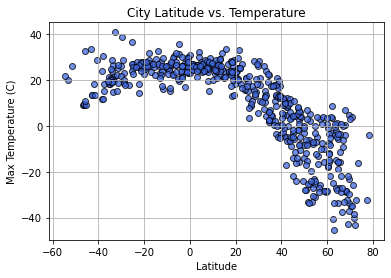

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="royalblue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

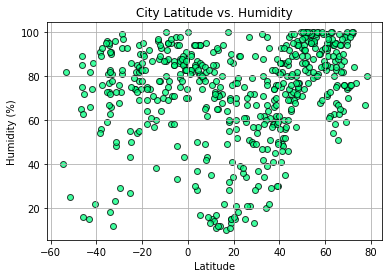

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="springgreen", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

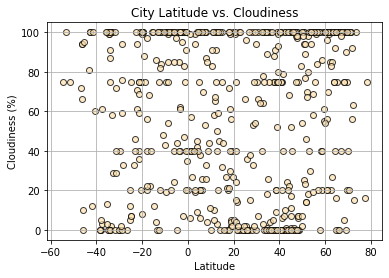

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="moccasin", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

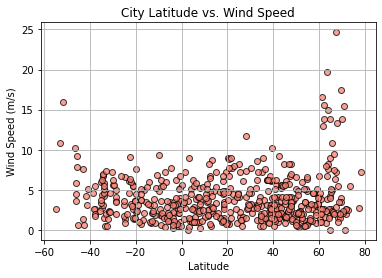

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="salmon", edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def lin_reg():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = (xc, yc)
    
    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker="o", color="darkorange", edgecolors="black")
    plt.plot(x_value, regression, color="red", linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=15, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iskateley,67.6803,53.1512,-4.01,82,100,7.24,RU,1675885376
4,kapaa,22.0752,-159.3190,25.18,79,0,7.72,US,1675885377
6,norman wells,65.2820,-126.8329,-26.98,76,75,2.57,CA,1675885378
7,lubao,14.9167,120.5500,24.04,80,100,3.41,PH,1675885378
10,paamiut,61.9940,-49.6678,-3.20,95,100,12.95,GL,1675885380


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,88,91,4.02,EC,1675885254
2,manokwari,-0.8667,134.0833,25.18,83,100,5.21,ID,1675885377
3,rikitea,-23.1203,-134.9692,26.39,74,46,6.12,PF,1675885377
5,punta arenas,-53.1500,-70.9167,20.01,82,100,10.80,CL,1675885369
8,port alfred,-33.5906,26.8910,20.66,91,100,0.45,ZA,1675885379


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8510386866728628


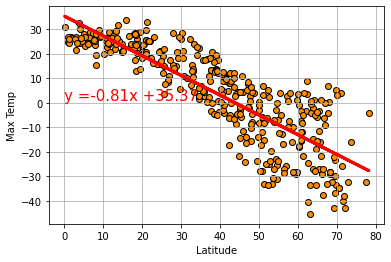

In [34]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
xc = 0
yc = 1

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.41254810083656873


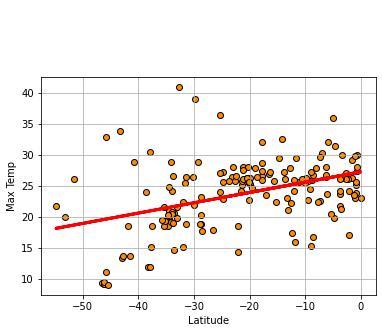

In [35]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
xc = -30
yc = 52

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

In the Northern Hemisphere, the relationship between the maximum temperature and latitude is demonstrably linear in the negative direction.  The temperature decreases steadily the further the measurement is taken from the equator. 

In the Southern Hemisphere, the relationship between the maximum temperature and latitude is linear in the positive direction.  The closer the measurement is taken to the equator, the higher the maximum temperature is.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4041448265743609


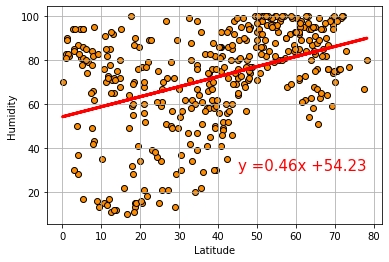

In [36]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
xc = 45
yc = 30

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.2987353186884733


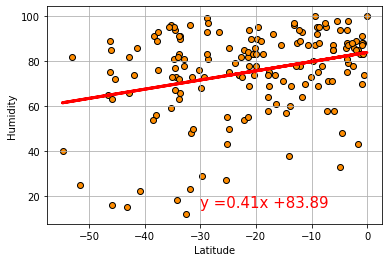

In [37]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
xc = -30
yc = 15

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

Te relationship between latitude and humidity is linear in the positive direction in both the Northern and Southern hemispheres.  In the Northern, as the measurement is taken further from the equator, the humidity steadily increases.  In the Southern, the closer the measurement is to the equator, the higher the humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2171554487458211


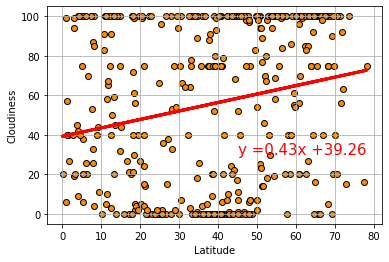

In [38]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
xc = 45
yc = 30

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.1868625879528163


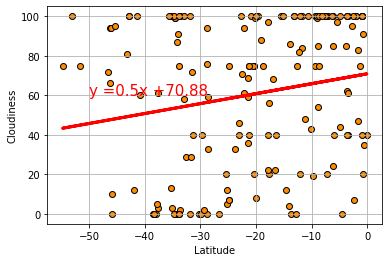

In [39]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
xc = -50
yc = 60

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The correlation between cloudiness and latitude is also linear in the positive direction for both the Northern and Southern Hemispheres.  In the Northern, the further the measurement is taken from the equator, the higher the percentage of cloudiness, while the cloudiness increases in the Southern as the measurement is taken closer to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1421766365891186


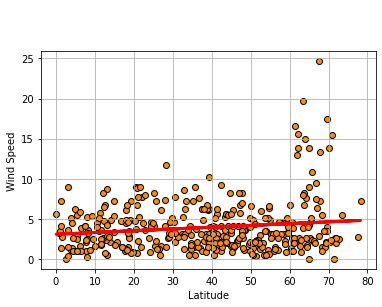

In [40]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
xc = 45
yc = 30

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.32159550088552935


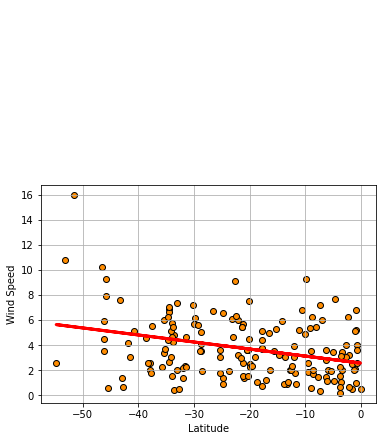

In [41]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
xc = -45
yc = 30

lin_reg()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In the Northern Hemisphere, there is a weak positive linear correlation between wind speed and latitude the further the measurement is taken from the equator.  There is a cluster of measurements in the higher range of wind speed in the latitudes between 60 and 70, but the majority of the measurements don't show any strong correlation.  

In the Southern Hemisphere, there is negative linear correlation between wind speed and latitude.  The closer to the equator, the higher the wind speed.  